<a href="https://colab.research.google.com/github/ncarolan/COS302/blob/main/HW8/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS302 - HW8

In [1]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt

SEED = 12

npr.seed(SEED)
np.set_printoptions(precision=3, suppress=True)

## Problem 2

### (C)

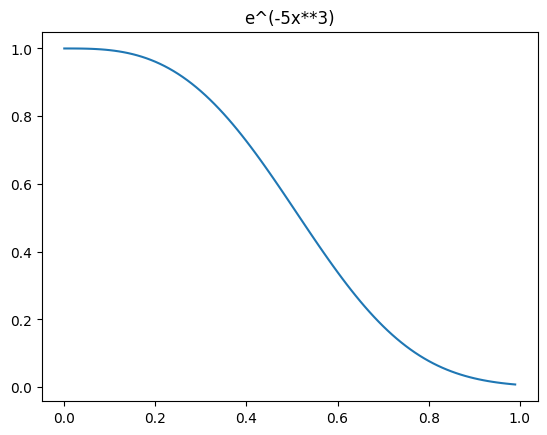

In [2]:
x = np.arange(0, 1, 0.01)
y = np.exp(-5 * x**3)

plt.plot(x,y); plt.title("e^(-5x**3)"); plt.show()

### (D)

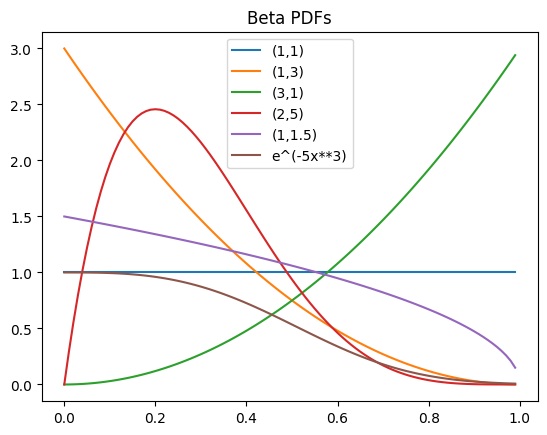

In [3]:
from re import A
from scipy.special import beta

x = np.arange(0, 1, 0.01)

pairs = [(1,1), (1,3), (3,1), (2,5), (1,1.5)]

for pair in pairs:
  a = pair[0]
  b = pair[1]

  y = x**(a-1) * (1-x)**(b-1) * (1/beta(a,b))

  plt.plot(x,y, label=f'({a},{b})')

plt.plot(x, np.exp(-5 * x**3), label="e^(-5x**3)")

plt.legend(); plt.title("Beta PDFs"); plt.show();

### (E)

In [4]:
import scipy.stats as stats

N = 10_000

for pair in pairs:
  a = pair[0]
  b = pair[1]

  y = stats.beta.rvs(a=a, b=b, size=N, random_state=SEED)
  e = np.sum(y) / N
  var = np.var(y)

  print(f'With a={a},b={b}; the mean sample is {e:.3f} with variance {var:.3f}')

With a=1,b=1; the mean sample is 0.499 with variance 0.083
With a=1,b=3; the mean sample is 0.251 with variance 0.038
With a=3,b=1; the mean sample is 0.749 with variance 0.038
With a=2,b=5; the mean sample is 0.285 with variance 0.025
With a=1,b=1.5; the mean sample is 0.400 with variance 0.067


Numerically computing the integral gives the value ~0.521. Because the expected value of a beta distribution is $\alpha / (\alpha + \beta)$, the distribution B(1,1) gives the best estimate.

## Problem 4

In [5]:
# Rows describe p(x|y), columns describe p(y|x)
pxy = np.array([
    [0.01, 0.02, 0.03, 0.1, 0.1],
    [0.05, 0.1, 0.05, 0.07, 0.2],
    [0.1, 0.05, 0.03, 0.05, 0.04]
])

### (A)

In [6]:
px = np.sum(pxy, axis=0) # Reduce distribution to P(x)
hx = -np.sum(px * np.log2(px))

print(f'H(X): {hx:.2f}')

H(X): 2.22


### (B)

In [7]:
py = np.sum(pxy, axis=1) # Reduce distribution to P(y)
hy = -np.sum(py * np.log2(py))

print(f'H(Y): {hy:.2f}')

H(Y): 1.53


### (C)

In [8]:
hxy = -np.sum(pxy * np.log2(pxy / py.reshape(3,1)))
print(f'H(X|Y): {hxy:.2f}')

H(X|Y): 2.07


### (D)

In [9]:
hyx = -np.sum(pxy * np.log2(pxy / px))
print(f'H(Y|X): {hyx:.2f}')

H(Y|X): 1.38


### (E)

In [10]:
joint_e = -np.sum(pxy * np.log2(pxy))
print(f'H(X,Y): {joint_e:.2f}')

H(X,Y): 3.59


### (F)

In [11]:
MOE = 1e-7
assert(abs((hx - hxy) - (hy - hyx)) < MOE)  # Use margin of error rather than absolute equality due to floating point values

mi = np.sum(pxy * np.log2(pxy / (px * py.reshape(3,1))))

assert(abs(mi - (hx - hxy)) < MOE)

print(f'I(X;Y): {mi:.4f}')

I(X;Y): 0.1502
